# Introdução


<p style='text-align: justify;'> O recrutamento interno é feito com funcionários da própria empresa. O primeiro passo na procura de pessoal é o recrutamento dentro da empresa, assim aproveitando e dando oportunidades aos funcionários já existentes na organização. O recrutamento interno exige uma série de dados e informações relacionadas, como: resultado dos testes de seleção, resultado das avaliações de desempenho, resultado dos programas de treinamento e aperfeiçoamento, exame das análises e discrições de cargos, exames dos planos de carreiras e verificação das condições de promoção e substituição. As grandes vantagens desse processo são a rapidez, os menores custos de recrutamento, seleção e treinamento do pessoal, já se conhece o desempenho anterior do funcionário, a criação de um clima sadio de progresso profissional, o aumento a moral e a motivação dos funcionários, desenvolvimento de uma positiva e sadia competição entre as pessoas. Após e etapa de recrutamento é necessário fazer o processo de seleção onde, a organização escolhe de uma lista de candidatos, a pessoa que melhor alcança os critérios de seleção, para a posição disponível, considerando as atuais condições de mercado. </p>



## O problema

<p style='text-align: justify;'> O departamento de Recursos Humanos atualmente possui um processo de coleta, processamento e análise dos dados, que é em sua maior parte manual. Dessa forma o RH enfrenta um problema </p>




## Descrição dos dados

Os dados utilizados nesse projeto foram obtidos no [Kaggle](https://www.kaggle.com/bhrt97/hr-analytics-classification/version/1).

In [107]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Descrição:

**employee_id:** identificação do colaborador

**department:** departamento no qual o colaborador trabalha

**region:** região de trabalho

**education:** nível de escolaridade

**gender:** gênero

**recruitment_channel:** meio pelo qual o colaborador foi recrutado para a empresa

**no_of_trainings:** número de treinamentos completados pelo colaborador no ano passado

**age:** idade 

**previous_year_rating:** avaliação do colaborador no ano passado

**length_of_service:** tempo de serviço (em anos)

**KPIs_met >80%:** se o colaborador atingiu pelo menos 80% nos indicadores chave de performance (KPIs)

**awards_won?:** se o colaborador ganhou algum prêmio no ano passado

**avg_training_score:**  pontuação média nas avaliações de treinamento atuais

**is_promoted**: se o colaborador foi promovido



## Ajuste e limpeza dos dados

Primeiro vamos verificar se existem dados faltantes

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [109]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Existem 2409 dados faltantes na coluna "education" e 4124 na coluna "previous_year_rating". Para decidir o que fazer com os dados faltantes, precisamos entender melhor como são distribuidos os dados dessas duas colunas

In [110]:
df["previous_year_rating"].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [111]:
df["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

Em "previous_year_rating" temos que os valores são números inteiros variando de 1 até 5, sendo assim os valores faltantes devem indicar colaboradores que não estavam na empresa no último ano e portanto não foram avaliados, dessa forma podemos atribuir o valor 0 para essas situações. Já em "education" temos uma variável categorica com três níveis de escolaridade, portanto os valores faltantes serão atribuidos ao menor nível de escolaridade "Below Secondary"

In [112]:
df["education"].fillna("Below Secondary", inplace = True)
df["previous_year_rating"].fillna(0, inplace = True)
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Agora é necessário ajeitar os dados da coluna region para que seja exibido o número da região, eliminando o conteudo "region_" das células

In [113]:
df["region"] = df["region"].str[7:]
df["region"] = df["region"].astype(int)
df["region"]

0         7
1        22
2        19
3        23
4        26
         ..
54803    14
54804    27
54805     1
54806     9
54807    22
Name: region, Length: 54808, dtype: int32

## Análise Exploratória dos Dados 

In [114]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [115]:
contarM = df["education"] == "Master's & above"
contarB = df["education"] == "Bachelor's"
contarS = df["education"] == "Below Secondary"


print(contarM.sum())
print(contarB.sum())
print(contarS.sum())

14925
36669
3214


In [116]:
df.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [117]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Criando o modelo

Para podemors criar o modelo, primeiramente precisamos transformar algumas variáveis categorias como departamento, nível de escolaridade, gênero e forma de recrutamento em variáveis númericas para que elas possam ser interpretadas corretamente pelo modelo de Machine Learning.


A coluna *education* como os níveis de escolaridade possuem uma hierarquia de importância, então codificaremos essa variável da  seguinte forma:
* *Below Secondary* = 0
* *Bachelor's* = 1
* *Master's & Above* = 2

In [118]:
df["education"] = df["education"].replace("Below Secondary" , 0)
df["education"] = df["education"].replace("Bachelor's" , 1)
df["education"] = df["education"].replace("Master's & above" , 2)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,2,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,1,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,1,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,1,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,1,m,other,1,45,3.0,2,0,0,73,0


Criando variáveis *dummies* para as demais variáveis categóricas 

In [119]:
dummy1 = pd.get_dummies(df["department"])
dummy2 = pd.get_dummies(df["gender"])
dummy3 = pd.get_dummies(df["recruitment_channel"])

dummys = pd.concat([dummy1, dummy2, dummy3] , axis  = 1)
dummys.head()     # mostrando todas as variáveis codificadas

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,other,referred,sourcing
0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,1,0,1,1,0,0


Juntando as variáveis codificadas ao conjunto de dados

In [120]:
df = pd.concat([df, dummys] , axis = 1)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,other,referred,sourcing
0,65438,Sales & Marketing,7,2,f,sourcing,1,35,5.0,8,...,0,0,0,1,0,1,0,0,0,1
1,65141,Operations,22,1,m,other,1,30,5.0,4,...,1,0,0,0,0,0,1,1,0,0
2,7513,Sales & Marketing,19,1,m,sourcing,1,34,3.0,7,...,0,0,0,1,0,0,1,0,0,1
3,2542,Sales & Marketing,23,1,m,other,2,39,1.0,10,...,0,0,0,1,0,0,1,1,0,0
4,48945,Technology,26,1,m,other,1,45,3.0,2,...,0,0,0,0,1,0,1,1,0,0


In [121]:
nomes = df.columns

nomes

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Analytics', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology', 'f', 'm', 'other', 'referred', 'sourcing'],
      dtype='object')

Modelo com todas as variáveis.

Primeiramente vamos dividir os dados em um conjunto de treino e outro de teste

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
varind = ["region" , "no_of_trainings" , "age" , "previous_year_rating" , "length_of_service" , "KPIs_met >80%", \
          "awards_won?" , "avg_training_score" , "Analytics", "Finance" , "HR" , \
          "Legal" , "Operations", "Procurement", "R&D" , "Sales & Marketing", \
          "m", "other", "sourcing"]   # nome das variáveis independentes

alvo = ["is_promoted"]  # variável dependente

X = df[varind]
y = df[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [124]:
# Feature Scaling

In [125]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()


# X_train[["age" , "previous_year_rating"]] = sc.fit_transform(X_train[["age" , "previous_year_rating"]].to_numpy())


# X_train.loc[:,7:14] = sc.fit_transform(X_train[:,7:14])
# X_test.loc[:,7:14] = sc.transform(X_test[:,7:14])

In [126]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# X_train["age"] = sc.fit_transform(X_train["age"].values.reshape(-1,1)) 


# X_train["age"] = sc.fit_transform(X_train.loc[:, ("age")].array.reshape(-1,1))

# X_train.loc[:,("age" , "previous_year_rating")] = sc.fit_transform(X_train.loc[:, ("age" , "previous_year_rating")])

Criando o modelo classificador logistico e medidando sua acurácia

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_classifier = LogisticRegression(max_iter=10000 , random_state = 0)
logistic_classifier.fit(X_train, y_train.values.ravel())

logistic_acc = logistic_classifier.score(X_test, y_test)

print("Acurácia do Modelo Logístico = " + str(logistic_acc) )

Acurácia do Modelo Logístico = 0.9324028461959496


Apesar da acurácia apresentar um valor alto e parecer que o modelo está bom, precisamos analisar mais profundamente olhando a matriz de confusão para podermos confirmar se essa acurácia realmente é um bom valor ou não.

In [128]:
cm = confusion_matrix(y_test, logistic_classifier.predict(X_test), labels = [1,0])

TP = cm[0,0]   # True Positives
TN = cm[1,1]   # True Negativos
FP = cm[1,0]   # False Positives
FN = cm[0,1]   # False Negatives

print("Verdadeiros Positivos = " + str(TP))
print("Verdadeiros Negativos = " + str(TN))
print("Falsos Positivos = " + str(FP))
print("Falsos Negativos = " + str(FN))

Verdadeiros Positivos = 224
Verdadeiros Negativos = 9997
Falsos Positivos = 44
Falsos Negativos = 697


Falar sobre os resultados da matriz de confusão e calcular as metricas


* **Precisão:** A precisão nos dirá de todos os colaboradores classificados como "Promovidos" a porcentagem que realmente deveria ser promovido. Ou seja, quanto melhor for essa métrica de avaliação evitaremos o caso de promover pessoas que não deveriam ser promovidas (Evitamos o erro do tipo 2)

* **Recall:** Também conhecido como Sensibilidade ou Revocação, nos dirá dentre todas as pessoas que deveriam ser classificadas como "Promovidos" quantas estão corretamente classificadas. Ou seja, quanto melhor for essa métrica evitaremos o caso de não promover uma pessoal que poderia ser promovida (Evitamos o erro do tipo 1)

* **F1:** Média harmônica entre a Precisão e o Recall. Dessa forma um modelo que apresenta um bom F1-score é um modelo capaz tanto de acertar suas predições (precisão alta) quanto de recuperar os exemplos da classe de interesse (recall alto). Portanto, esta métrica tende a ser um resumo melhor da qualidade do modelo. Uma desvantagem é que a F1 acaba sendo menos interpretável que a acurácia.

In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score

Precision = precision_score(y_test, logistic_classifier.predict(X_test))
Recall = recall_score(y_test, logistic_classifier.predict(X_test))
f1 = f1_score(y_test, logistic_classifier.predict(X_test))

print("Modelo Logístico - Métricas de Avaliação:")
print("Precisão = " + str(round(Precision,2)))
print("Recall = " + str(round(Recall,2)))
print("F1 = " + str(round(f1,2)))


Modelo Logístico - Métricas de Avaliação:
Precisão = 0.84
Recall = 0.24
F1 = 0.38


In [130]:
from sklearn.metrics import roc_curve

probs = logistic_classifier.predict_proba(X_test)[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, probs) 

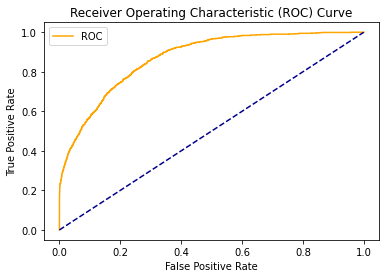

In [131]:
import matplotlib.pyplot as plt 

plt.plot(FPR, TPR, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Testando randomforest 

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 0)
rf_classifier.fit(X_train, y_train.values.ravel())

rf_acc = rf_classifier.score(X_test, y_test)

print("Acurácia do Modelo Random Forest = " + str(rf_acc) )

Acurácia do Modelo Random Forest = 0.9392446633825944


In [133]:
cm = confusion_matrix(y_test, rf_classifier.predict(X_test), labels = [1,0])

TP = cm[0,0]   # True Positives
TN = cm[1,1]   # True Negativos
FP = cm[1,0]   # False Positives
FN = cm[0,1]   # False Negatives

print("Verdadeiros Positivos = " + str(TP))
print("Verdadeiros Negativos = " + str(TN))
print("Falsos Positivos = " + str(FP))
print("Falsos Negativos = " + str(FN))

Verdadeiros Positivos = 298
Verdadeiros Negativos = 9998
Falsos Positivos = 43
Falsos Negativos = 623


In [134]:
Precision = precision_score(y_test, rf_classifier.predict(X_test))
Recall = recall_score(y_test, rf_classifier.predict(X_test))
f1 = f1_score(y_test, rf_classifier.predict(X_test))

print("Modelo Random Forest - Métricas de Avaliação:")
print("Precisão = " + str(round(Precision,2)))
print("Recall = " + str(round(Recall,2)))
print("F1 = " + str(round(f1,2)))


Modelo Random Forest - Métricas de Avaliação:
Precisão = 0.87
Recall = 0.32
F1 = 0.47


In [135]:
feature_imp = pd.Series(rf_classifier.feature_importances_,index= varind).sort_values(ascending=False)
feature_imp

avg_training_score      0.318316
age                     0.147982
region                  0.122212
length_of_service       0.105605
previous_year_rating    0.057686
KPIs_met >80%           0.048589
Sales & Marketing       0.028747
awards_won?             0.028208
no_of_trainings         0.023889
m                       0.021120
Operations              0.020416
sourcing                0.014572
other                   0.014187
Analytics               0.013738
Procurement             0.013582
Finance                 0.007739
R&D                     0.006132
HR                      0.004446
Legal                   0.002832
dtype: float64

No handles with labels found to put in legend.


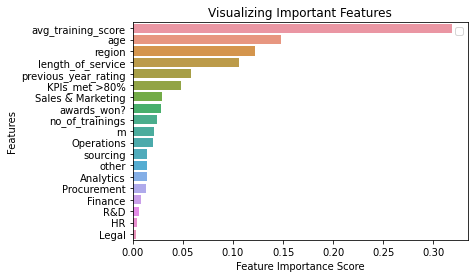

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


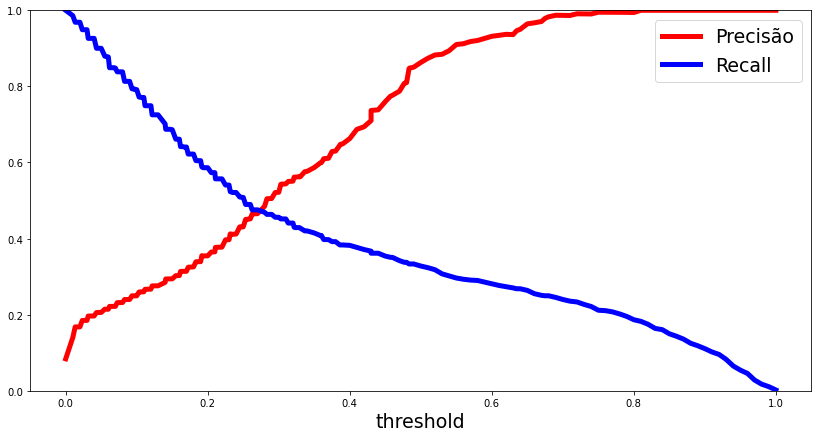

In [137]:
#colocar essa parte la na avaliação dos modelos


from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf_classifier.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precisão", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Logistic: f1=0.438 auc=0.493


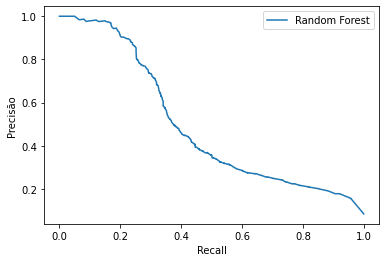

In [149]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# predict probabilities
lr_probs = rf_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = rf_classifier.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
plt.plot(lr_recall, lr_precision, label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precisão')
# show the legend
plt.legend()
# show the plot
plt.show()

In [138]:
# testando modelo com as 4 melhores variaveis  (precisa ajeitar essa parte do varind na criacao do modelo com as melhores variaveis)

varind = ["no_of_trainings" , "age" , "previous_year_rating" , "length_of_service" , "KPIs_met >80%", \
          "awards_won?" , "avg_training_score" , \
          "Operations", "Sales & Marketing", \
          "m", "other", "sourcing"]   # nome das variáveis independentes

alvo = ["is_promoted"]  # variável dependente

X = df[varind]
y = df[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 0)
rf_classifier.fit(X_train, y_train.values.ravel())

rf_acc = rf_classifier.score(X_test, y_test)

print("Acurácia do Modelo Random Forest = " + str(rf_acc) )

Acurácia do Modelo Random Forest = 0.9300310162379128


In [139]:
cm = confusion_matrix(y_test, rf_classifier.predict(X_test), labels = [1,0])

TP = cm[0,0]   # True Positives
TN = cm[1,1]   # True Negativos
FP = cm[1,0]   # False Positives
FN = cm[0,1]   # False Negatives

print("Verdadeiros Positivos = " + str(TP))
print("Verdadeiros Negativos = " + str(TN))
print("Falsos Positivos = " + str(FP))
print("Falsos Negativos = " + str(FN))

Verdadeiros Positivos = 299
Verdadeiros Negativos = 9896
Falsos Positivos = 145
Falsos Negativos = 622


In [140]:
Precision = precision_score(y_test, rf_classifier.predict(X_test))
Recall = recall_score(y_test, rf_classifier.predict(X_test))
f1 = f1_score(y_test, rf_classifier.predict(X_test))

print("Modelo Random Forest - Métricas de Avaliação:")
print("Precisão = " + str(round(Precision,2)))
print("Recall = " + str(round(Recall,2)))
print("F1 = " + str(round(f1,2)))

Modelo Random Forest - Métricas de Avaliação:
Precisão = 0.67
Recall = 0.32
F1 = 0.44


In [141]:
#usar se for necessário

print(classification_report(y_test, logistic_classifier.predict(X_test), target_names=["Não Promover", "Promover"]))

ValueError: X has 12 features per sample; expecting 19

## Analisando os modelos 

Para escolher qual foi o melhor modelo devemos olhar a métrica da precisão (mais informações acessar [trade-off precisão/recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c))

## Modelo (não colocar, primeira tentativa)

Tentativa inicial nao colocar no projeto

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#
#    varind = ["no_of_trainings" , "age" , "previous_year_rating" , "KPIs_met >80%", \
#          "awards_won?" , "avg_training_score"]   # nome das variáveis independentes
#
#    alvo = ["is_promoted"]  # variável dependente
#
#    X = df[varind]
#    y = df[alvo]
#
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 


In [ ]:
df2 = X_train.append(y_train)
df2.corr()

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt


sn.heatmap(df2.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(X_train, y_train.values.ravel())

In [ ]:
logistic_classifier.intercept_

In [ ]:
logistic_classifier.coef_

In [ ]:
logistic_classifier.predict_proba(X_train)

In [ ]:
logistic_classifier.predict(X_train)

In [ ]:
logistic_classifier.score(X_train, y_train)

In [ ]:
logistic_classifier.predict(X_test)

In [ ]:
logistic_classifier.score(X_test, y_test)

In [ ]:
confusion_matrix(y_test, logistic_classifier.predict(X_test))

In [ ]:
logistic_classifier.predict_proba(X_test)[:,1]

In [ ]:
logistic_classifier.predict_proba(X_test)[:,1].max()  #maior probabilidade

In [ ]:
logistic_classifier.predict_proba(X_test)[:,1].argmax()

In [ ]:
X_test

In [ ]:
df.iloc[logistic_classifier.predict_proba(X_test)[:,1].argmax()]    #mudar X_test por X_topredict